## Heart Disease Research
In this project, I reviewed and analyzed data from a sample of patients evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). 

We will study a number of **quantitative, binary, and categorical variables**, produce **boxplots**, and utilize **hypothesis testing** to better understand the relationships between the variables. This project was completed in the *Master Statistics with Python* skill path on Codecademy.

#### Focus Areas for Analysis
- Determine whether there is an association between people with heart disease and another healther indicator such as high cholesterol, fasting blood sugar, and maximum heart rate. 
- Utilize hypothesis testing - namely one-sample t-test, binomial test, two-sample t-test, ANOVA test, Tukey's range test, and chi-square test - to draw inferences about a population from the sample of data.

#### Variables in Dataset
- age: age in years
- sex: sex assigned at birth; 'male' or 'female'
- trestbps: resting blood pressure in mm Hg
- chol: serum cholesterol in mg/dl
- cp: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
- exang: whether the patient experiences exercise-induced angina (1: yes; 0: no)
- fbs: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
- thalach: maximum heart rate achieved in exercise test
- heart_disease: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [2]:
# load data and inspect data
heart = pd.read_csv(r'C:\Users\mrend\PycharmProjects\heart.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


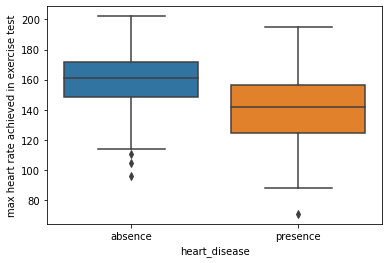

In [3]:
# box plot measuring maximum heart rate during excersize in both patients with heart disease and without.
sns.boxplot(x=heart.heart_disease, y=heart.thalach)
plt.ylabel('max heart rate achieved in exercise test')
plt.show()

Based on this plot, patients diagnosed with heart disease generally had a lower maximum heart rate during their exercise test.

In [4]:
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

In [5]:
# calculate and print mean difference between patients with heart disease and without.
mean_diff = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print('Mean heart rate difference between patients with and without heart disease: ', mean_diff)
# calculate and print median difference between patients with heart disease and without.
med_diff = np.median(thalach_no_hd) - np.median(thalach_hd)
print('Median heart rate difference between patients with and without heart disease: ', med_diff)

Mean heart rate difference between patients with and without heart disease:  19.11905597473242
Median heart rate difference between patients with and without heart disease:  19.0


In [6]:
# run two-sample t-test
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print('p-value for Maximum Heart Rate and Heart Disease association: ', pval)

p-value for Maximum Heart Rate and Heart Disease association:  3.456964908430172e-14


This p-value is less than 0.05, so we can “reject the null hypothesis” and conclude that there is a significant difference in Maximum Heart Rate for people with heart disease compared to people without heart disease.

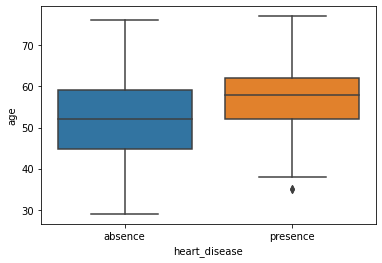

`age` mean Difference:  4.040533426917001
`age` median Difference:  6.0


In [7]:
# investigating other quantitative variables - age
sns.boxplot(x=heart.heart_disease, y=heart.age)
plt.show()
age_hd = heart.age[heart.heart_disease == 'presence']
age_no_hd = heart.age[heart.heart_disease == 'absence']
mean_diff = np.mean(age_hd) - np.mean(age_no_hd)
print('`age` mean Difference: ', mean_diff)
med_diff = np.median(age_hd) - np.median(age_no_hd)
print('`age` median Difference: ', med_diff)

In [8]:
tstat, pval = ttest_ind(age_hd, age_no_hd)
print('p-value for age two-sample t-test: ', pval)

p-value for age two-sample t-test:  8.955636917529706e-05


Using a 0.05 significance threshold, age is significantly associated with heart disease. 

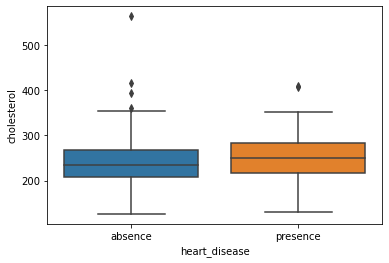

`cholesterol` mean Difference:  8.834576241445887
`cholesterol ` median Difference:  14.5


In [9]:
#cholesterol
sns.boxplot(x=heart.heart_disease, y=heart.chol)
plt.ylabel('cholesterol')
plt.show()
chol_hd = heart.chol[heart.heart_disease == 'presence']
chol_no_hd = heart.chol[heart.heart_disease == 'absence']
mean_diff = np.mean(chol_hd) - np.mean(chol_no_hd)
print('`cholesterol` mean Difference: ', mean_diff)
med_diff = np.median(chol_hd) - np.median(chol_no_hd)
print('`cholesterol ` median Difference: ', med_diff)

In [10]:
tstat, pval = ttest_ind(chol_hd, chol_no_hd)
print('p-value for cholesterol two-sample t-test: ', pval)

p-value for cholesterol two-sample t-test:  0.13914167020436527


Using a 0.05 significance threshold, cholesterol is not significantly associated with heart disease (p = 0.13914167020436527).

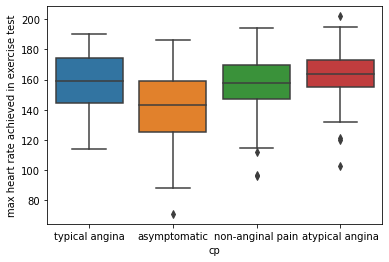

In [11]:
# box plot of Maximum Exercise Heart Rate based on Chest Pain Type
sns.boxplot(x=heart.cp, y=heart.thalach)
plt.ylabel('max heart rate achieved in exercise test')
plt.show()

#### Testing the following hypotheses:
Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average maximum heart rate while exercising.

Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average maximum heart rate while exercising.

In [12]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

# run ANOVA
from scipy.stats import f_oneway
Fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print("P-value for forms of chest pain regarding maximum heart rate: ", pval)

P-value for forms of chest pain regarding maximum heart rate:  1.9065505247705008e-10


Given that the pval in the ANOVA test for chest pain and maximum heart rate is 1.9e-10, which is less than the significance threshold of 0.05, we will reject the null hypothesis that states that all people have the same average maximum heart rate. There is at least one pair of chest pain types that have significantly different maximum heart rates during exercise.

#### Running additional tests to determine which pair(s) has a significant relationship

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
output = pairwise_tukeyhsd(heart.thalach, heart.cp)
print(output)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


According to the Tukey results, we can determine that the following pairs of chest pain types have significantly different maximum heart rates: asymptomatic and atypical angina; asymptomatic and non-anginal pain; asymptomatic and typical angina.

Investigating the relationship between the kind of chest pain a person experiences and whether or not they have heart disease.

In [14]:
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
Xtab

heart_disease,absence,presence
cp,,
asymptomatic,39,105
atypical angina,41,9
non-anginal pain,68,18
typical angina,16,7


#### Testing the following hypotheses:
Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.

Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.

In [15]:
# run chi-square test
from scipy.stats import chi2_contingency
chi2, pval, dof, exp = chi2_contingency(Xtab)
print('p-value for chi-square test: ', pval)

p-value for chi-square test:  1.2517106007837527e-17


We can conclude that there is a significant association between these chest pain and heart disease.